[[55  3]
 [ 1 21]]
Accuracy score: 0.95
Precision score: 0.875
Recall score: 0.9545454545454546


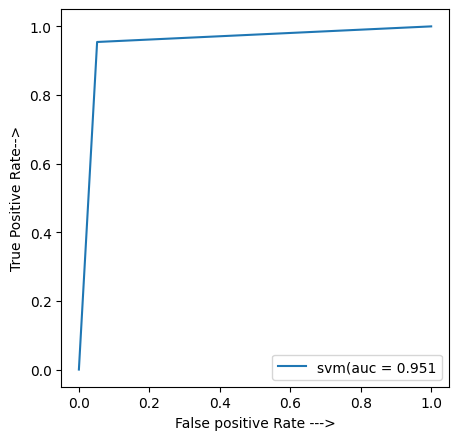

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv("iphone_purchase_records.csv")
#print(dataset)
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, 3].values

from sklearn.preprocessing import LabelEncoder
labelEncoder_gender =  LabelEncoder()
X[:,0] = labelEncoder_gender.fit_transform(X[:,0])

# Step 3 - Split into Train and Test set   
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Step 4 - Feature Scaling    # for normalization
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

# Step 5 - Fit SVC Classifier
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf", random_state=0)
classifier.fit(X_train, y_train)

# Step 6 - Predict
y_pred = classifier.predict(X_test)


# Step 7 - Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred) 
print("Recall score:",recall)

#for plots curve (ROC & AUC)

from sklearn.metrics import roc_curve , auc

svm_fpr , svm_tpr , threshold = roc_curve(y_test , y_pred)
auc_svm = auc(svm_fpr , svm_tpr)

plt.figure(figsize=(5 , 5) , dpi=100)
plt.plot(svm_fpr , svm_tpr , linestyle='-' , label = 'svm(auc = %0.3f' % auc_svm)
plt.xlabel('False positive Rate --->')
plt.ylabel('True Positive Rate-->')
plt.legend()
plt.show()

